In [10]:
import os
import numpy as np
import cv2

In [11]:
import matplotlib.pyplot as plt

In [12]:
covid_folder = os.path.join(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", 'COVID')
normal_folder = os.path.join(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", 'NORMAL')

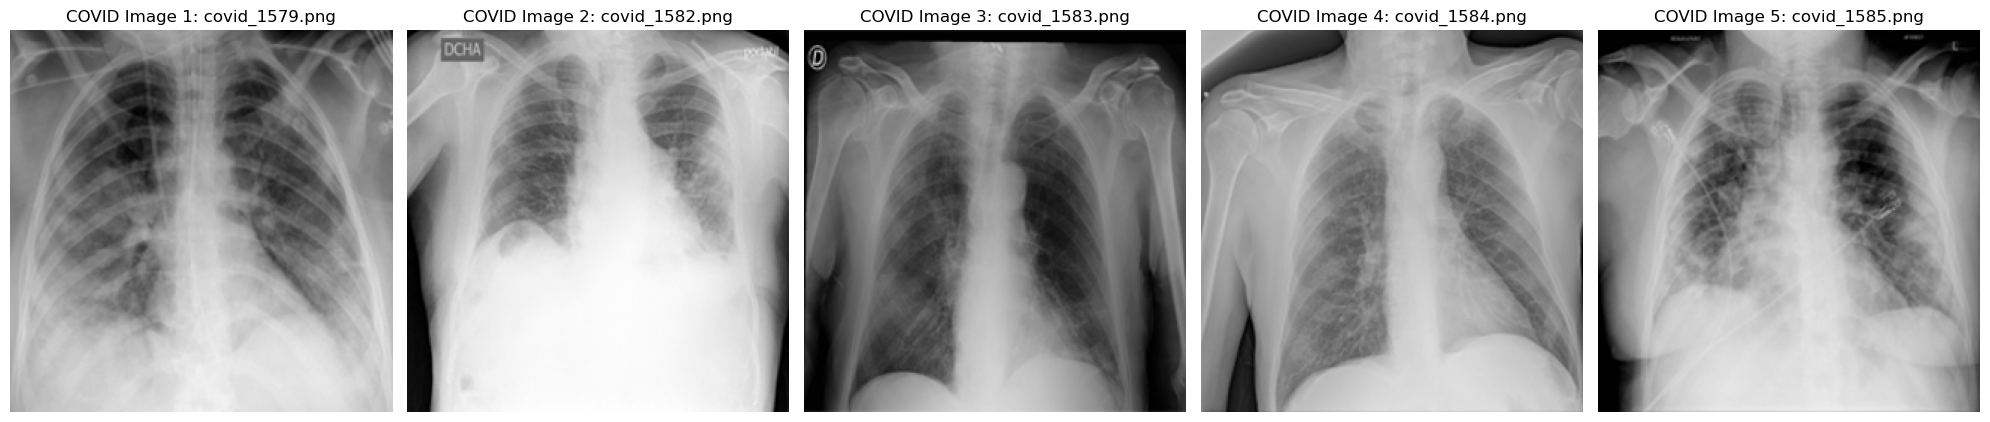

In [13]:
# displaying the images in a Grid
def load_images_from_folder(folder, num_images=5):
    images = []
    filenames = os.listdir(folder)[:num_images]  # Get first num_images files
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((filename, img))
    return images

# Loading images from the dataset folder
covid_images = load_images_from_folder(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", num_images=5)
normal_images = load_images_from_folder(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", num_images=5)

# Displaying the first COVID image using matplotlib
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images

for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB for proper display
    ax.imshow(img_rgb)
    ax.set_title(f'COVID Image {i + 1}: {filename}')  # Setting indexed title
    ax.axis('off')  # Hiding axis ticks and labels

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()

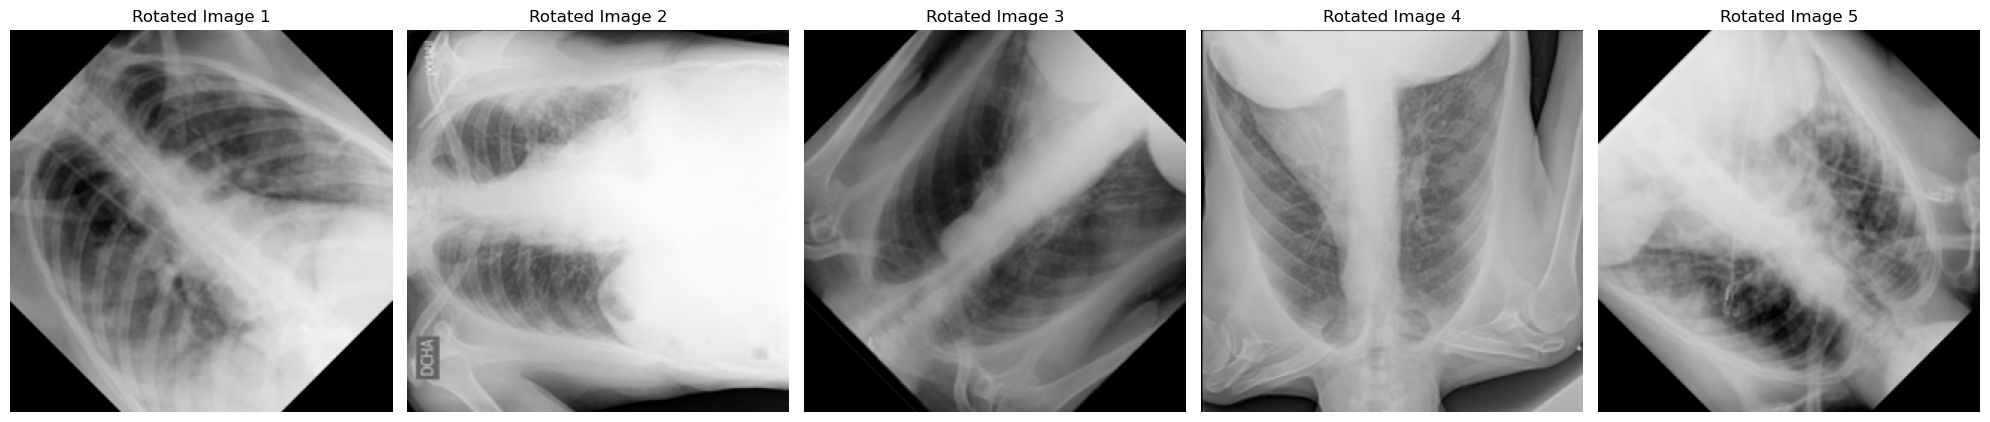

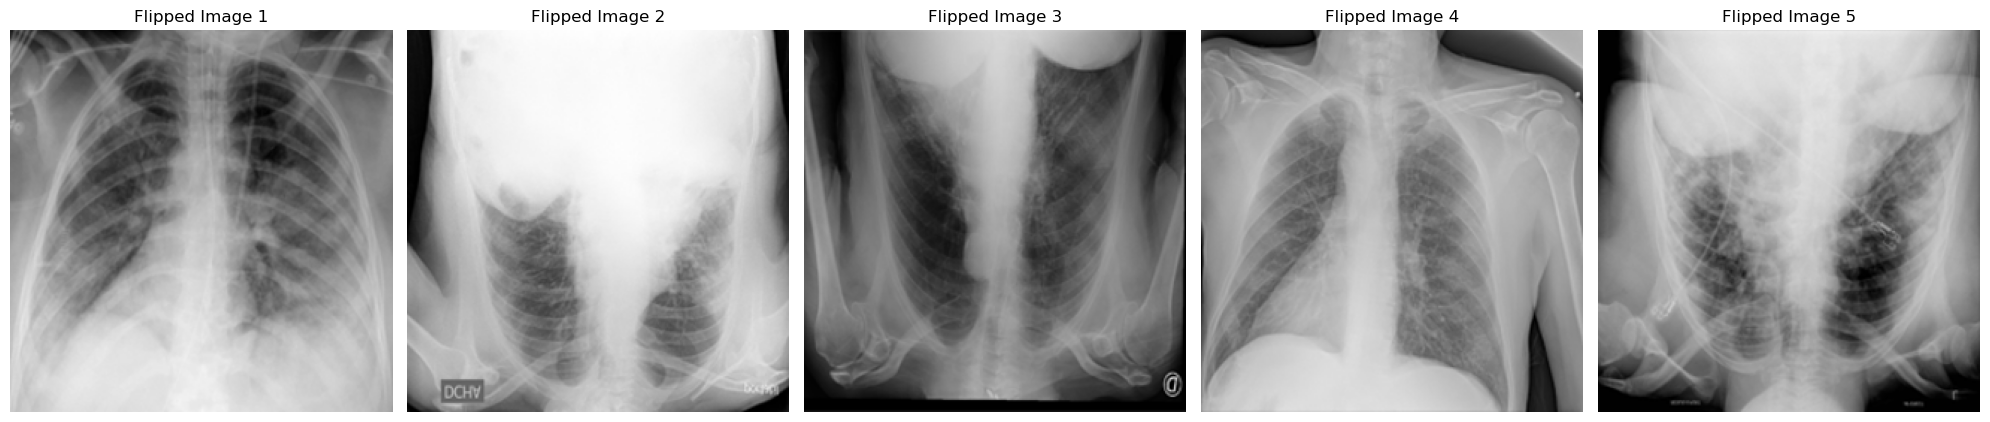

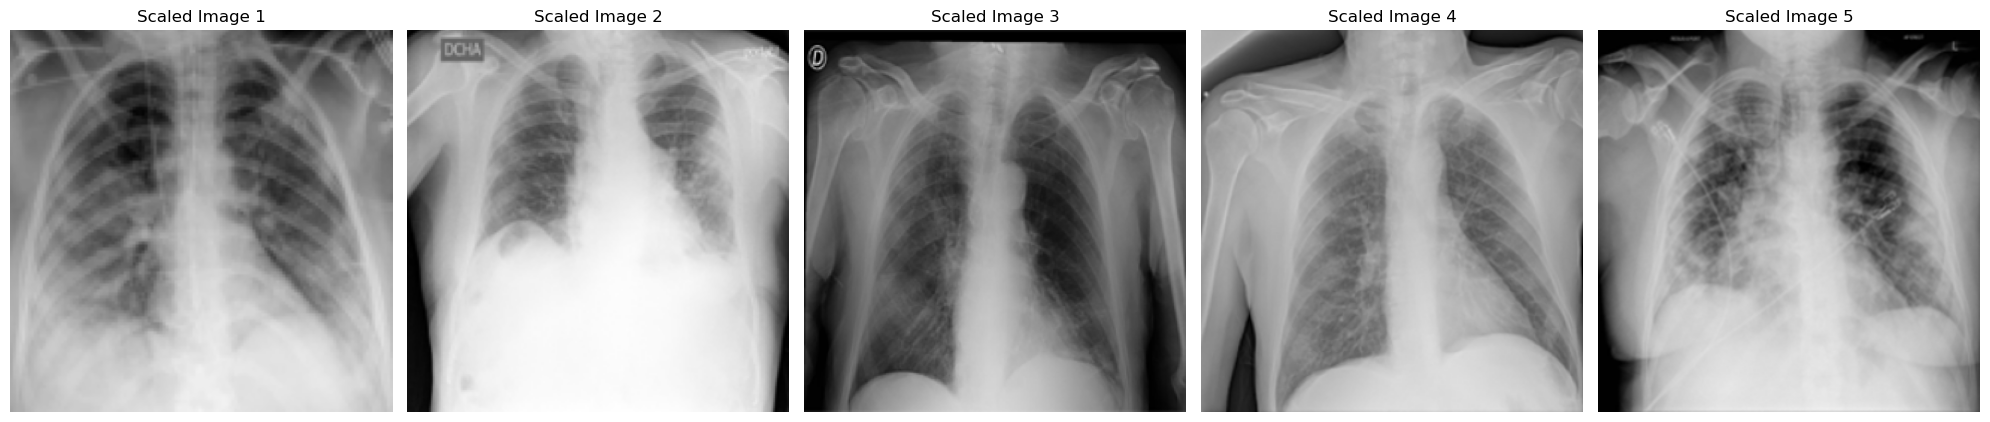

In [14]:
#Rotating, flipping and scaling the images
def rotate_image(image, angle):
    """Rotate the image by the specified angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def flip_image(image, flip_code):
    """Flip the image: flip_code 1=horizontal, 0=vertical, -1=both axes."""
    return cv2.flip(image, flip_code)

def scale_image(image, scale_factor):
    """Scale the image by a given factor."""
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor)


# Section 1: Rotating images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images
for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    rotated_img = rotate_image(img, angle=45 * (i + 1))  # Rotate each image by 45, 90, 135, etc.
    img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f'Rotated Image {i + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Section 2: Flipping images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images
flip_codes = [1, 0, -1, 1, 0]  # Different flip codes: horizontal, vertical, both axes
for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    flipped_img = flip_image(img, flip_code=flip_codes[i])
    img_rgb = cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f'Flipped Image {i + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Section 3: Scaling images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images
scale_factors = [0.5, 0.75, 1.0, 1.25, 1.5]  # Different scaling factors
for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    scaled_img = scale_image(img, scale_factor=scale_factors[i])
    img_rgb = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(f'Scaled Image {i + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()


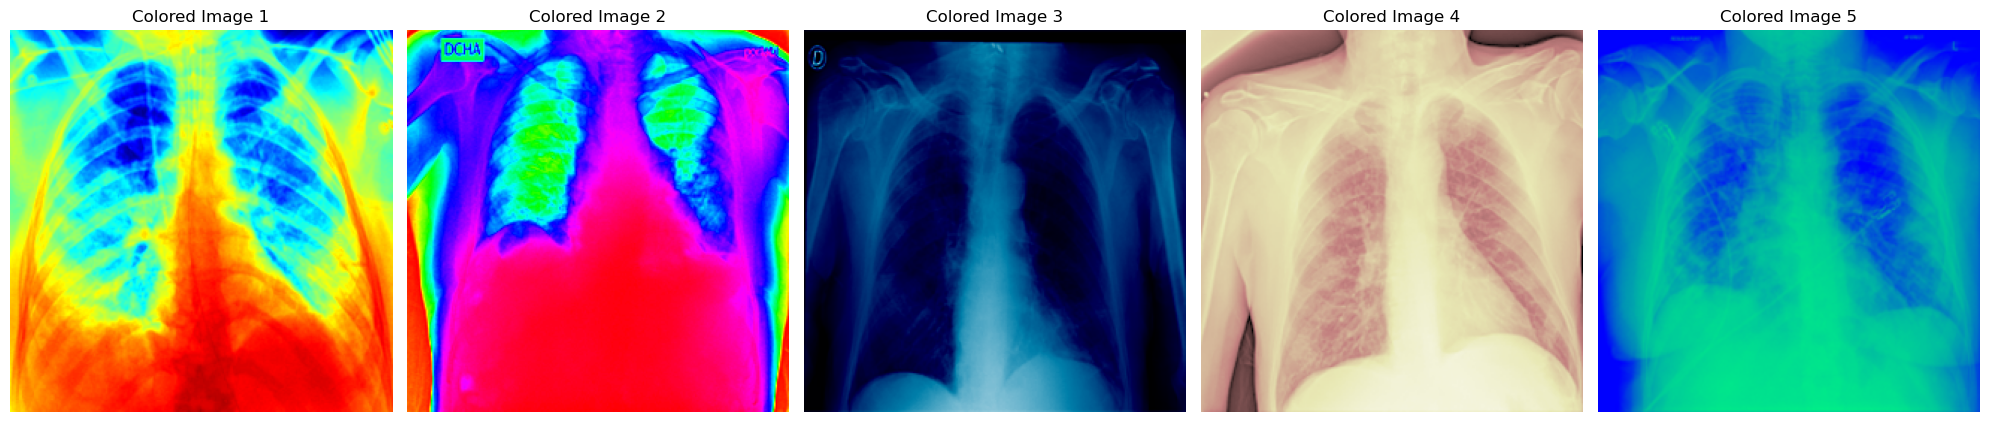

In [15]:
# Color transformations
def apply_color_map(image, color_map):
    """Apply a color map to the image."""
    return cv2.applyColorMap(image, color_map)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images
color_maps = [cv2.COLORMAP_JET, cv2.COLORMAP_HSV, cv2.COLORMAP_OCEAN, cv2.COLORMAP_PINK, cv2.COLORMAP_WINTER]  # Different color maps
for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    # Convert the image to grayscale first (required for applyColorMap)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    color_img = apply_color_map(img_gray, color_map=color_maps[i])
    img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
    ax.imshow(img_rgb)
    ax.set_title(f'Colored Image {i + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [16]:
# Section 5: Understanding image properties
for i, (filename, img) in enumerate(covid_images):
    # Image properties
    height, width, channels = img.shape  # Get image dimensions
    img_dtype = img.dtype  # Get image data type
    min_val, max_val = img.min(), img.max()  # Get minimum and maximum pixel values

    print(f"Image {i + 1}: {filename}")
    print(f"  - Dimensions: {width}x{height}")
    print(f"  - Channels: {channels}")
    print(f"  - Data Type: {img_dtype}")
    print(f"  - Min Pixel Value: {min_val}")
    print(f"  - Max Pixel Value: {max_val}")
    print("-" * 40)


Image 1: covid_1579.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 246
----------------------------------------
Image 2: covid_1582.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 255
----------------------------------------
Image 3: covid_1583.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 219
----------------------------------------
Image 4: covid_1584.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 225
----------------------------------------
Image 5: covid_1585.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 239
----------------------------------------


In [17]:
# Additional properties
# Section: Extracting Image Properties
for i, (filename, img) in enumerate(covid_images):
    # Basic properties
    height, width, channels = img.shape
    img_dtype = img.dtype
    min_val, max_val = img.min(), img.max()
    
    aspect_ratio = width / height
    image_size = width * height
    mean_val, std_dev = cv2.meanStdDev(img)
    orientation = "Landscape" if width > height else "Portrait"
    
    # Print extracted properties
    print(f"Image {i + 1}: {filename}")
    print(f"  - Dimensions: {width}x{height}")
    print(f"  - Channels: {channels}")
    print(f"  - Data Type: {img_dtype}")
    print(f"  - Min Pixel Value: {min_val}")
    print(f"  - Max Pixel Value: {max_val}")
    print(f"  - Aspect Ratio: {aspect_ratio:.2f}")
    print(f"  - Image Size (Total Pixels): {image_size}")
    print(f"  - Mean Pixel Value: {mean_val.flatten()}")
    print(f"  - Standard Deviation of Pixel Values: {std_dev.flatten()}")
    print(f"  - Orientation: {orientation}")
    print("-" * 40)

Image 1: covid_1579.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 246
  - Aspect Ratio: 1.00
  - Image Size (Total Pixels): 65536
  - Mean Pixel Value: [145.84213257 145.84213257 145.84213257]
  - Standard Deviation of Pixel Values: [53.70261991 53.70261991 53.70261991]
  - Orientation: Portrait
----------------------------------------
Image 2: covid_1582.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 255
  - Aspect Ratio: 1.00
  - Image Size (Total Pixels): 65536
  - Mean Pixel Value: [185.62513733 185.62513733 185.62513733]
  - Standard Deviation of Pixel Values: [60.84062233 60.84062233 60.84062233]
  - Orientation: Portrait
----------------------------------------
Image 3: covid_1583.png
  - Dimensions: 256x256
  - Channels: 3
  - Data Type: uint8
  - Min Pixel Value: 0
  - Max Pixel Value: 219
  - Aspect Ratio: 1.00
  - Image Size (Total Pixels): 65536
  - M

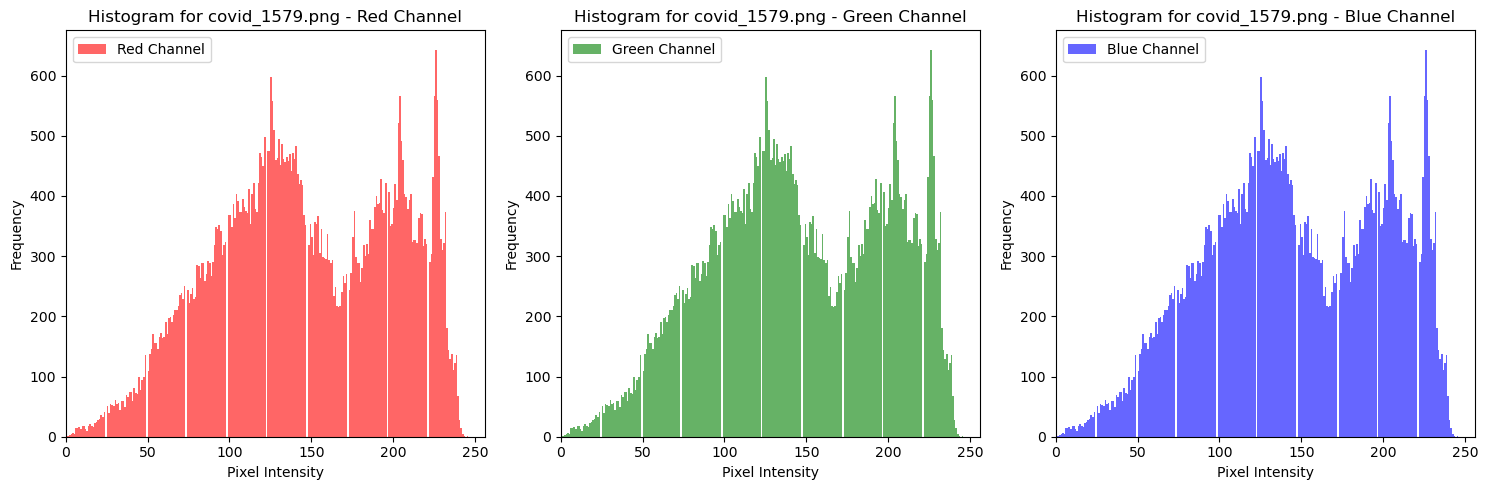

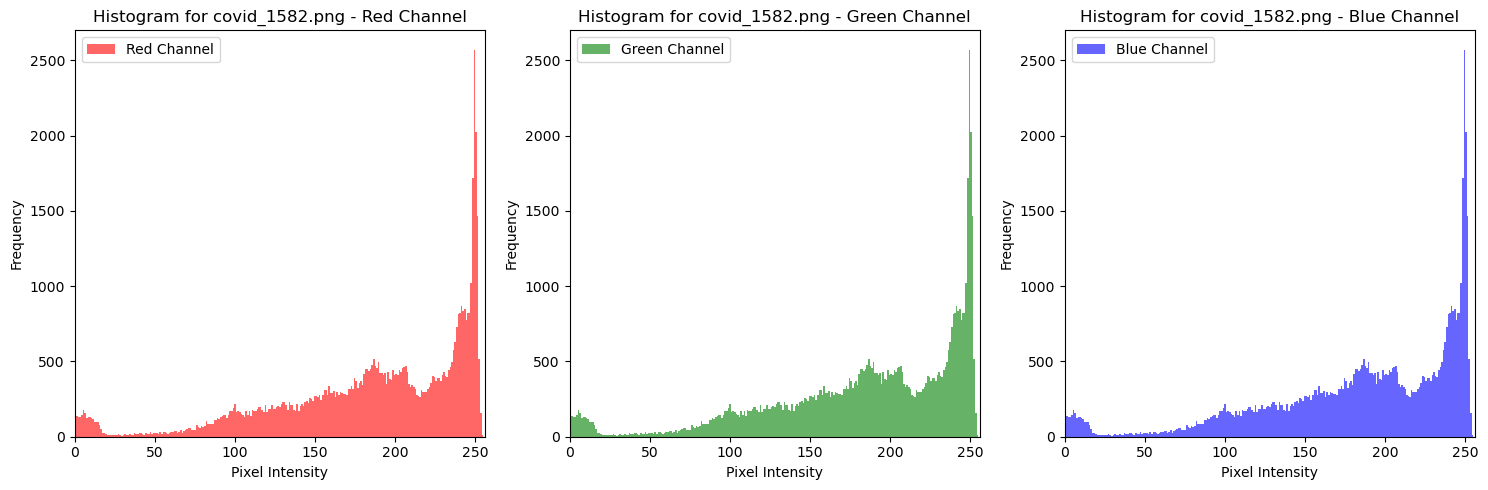

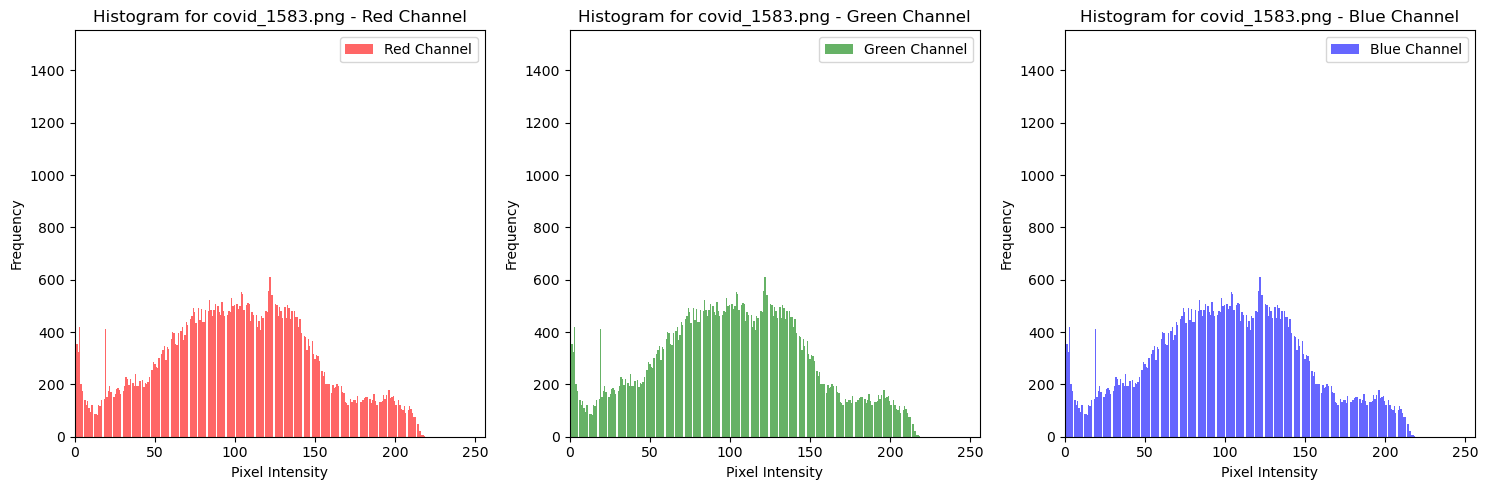

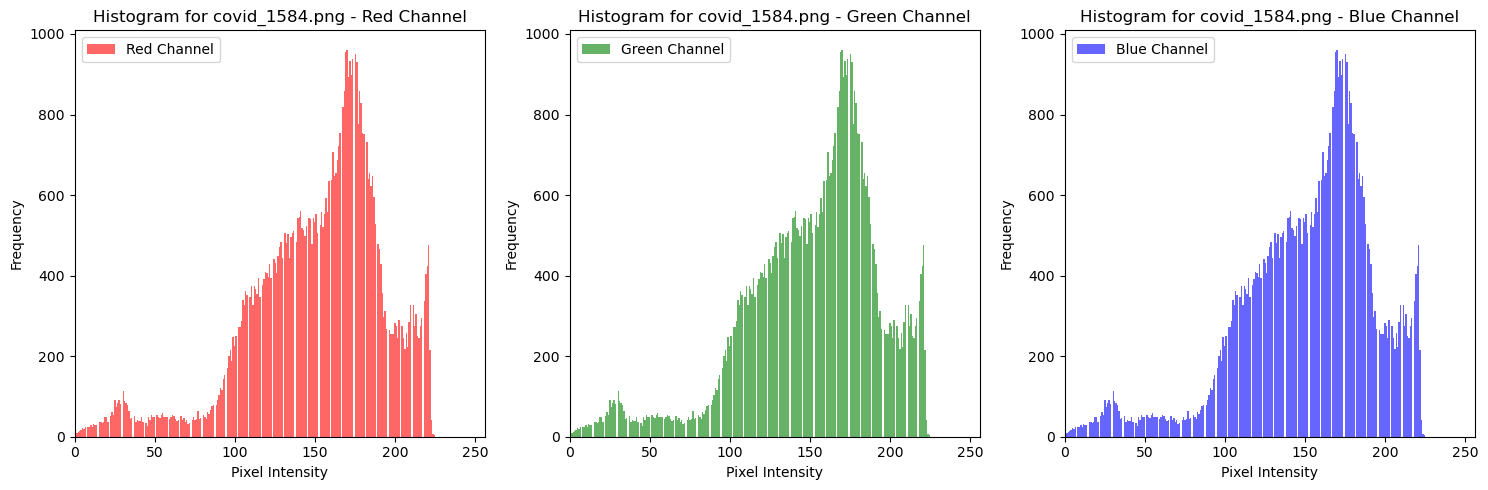

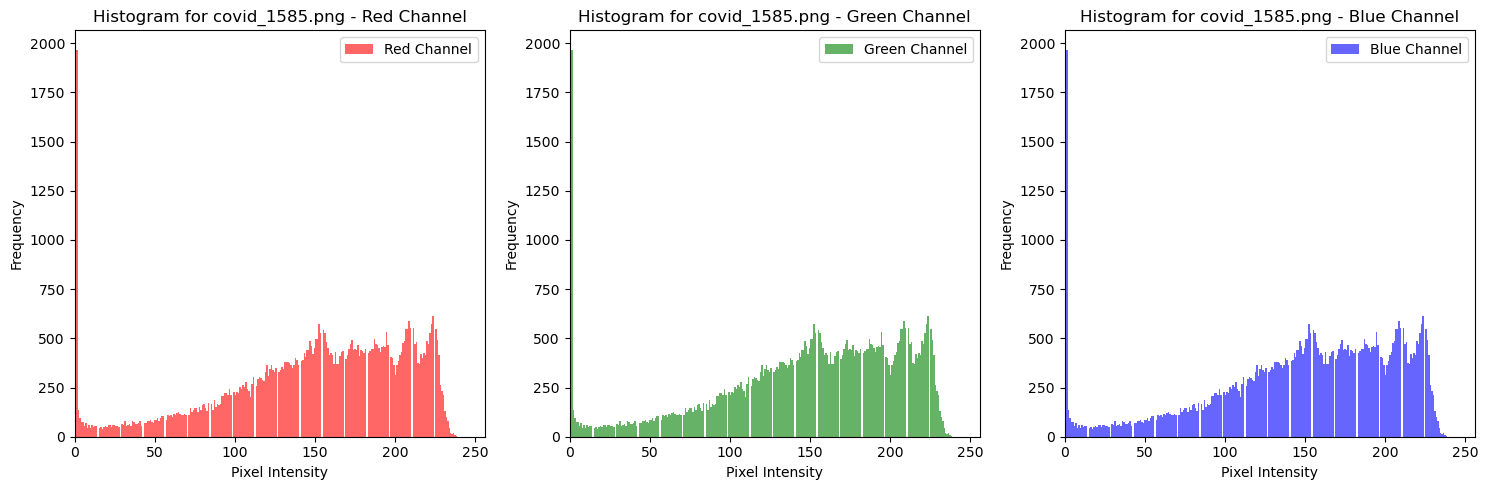

In [18]:
# Section: Plotting Histograms
for i, (filename, img) in enumerate(covid_images):
    # Convert image to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split the image into its color channels
    r_channel, g_channel, b_channel = cv2.split(img_rgb)

    # Create a figure for histograms
    plt.figure(figsize=(15, 5))

    # Plot histograms for each channel
    plt.subplot(1, 3, 1)
    plt.hist(r_channel.ravel(), bins=256, color='red', alpha=0.6, label='Red Channel')
    plt.title(f'Histogram for {filename} - Red Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.hist(g_channel.ravel(), bins=256, color='green', alpha=0.6, label='Green Channel')
    plt.title(f'Histogram for {filename} - Green Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.6, label='Blue Channel')
    plt.title(f'Histogram for {filename} - Blue Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()

    # Show the histograms
    plt.tight_layout()
    plt.show()

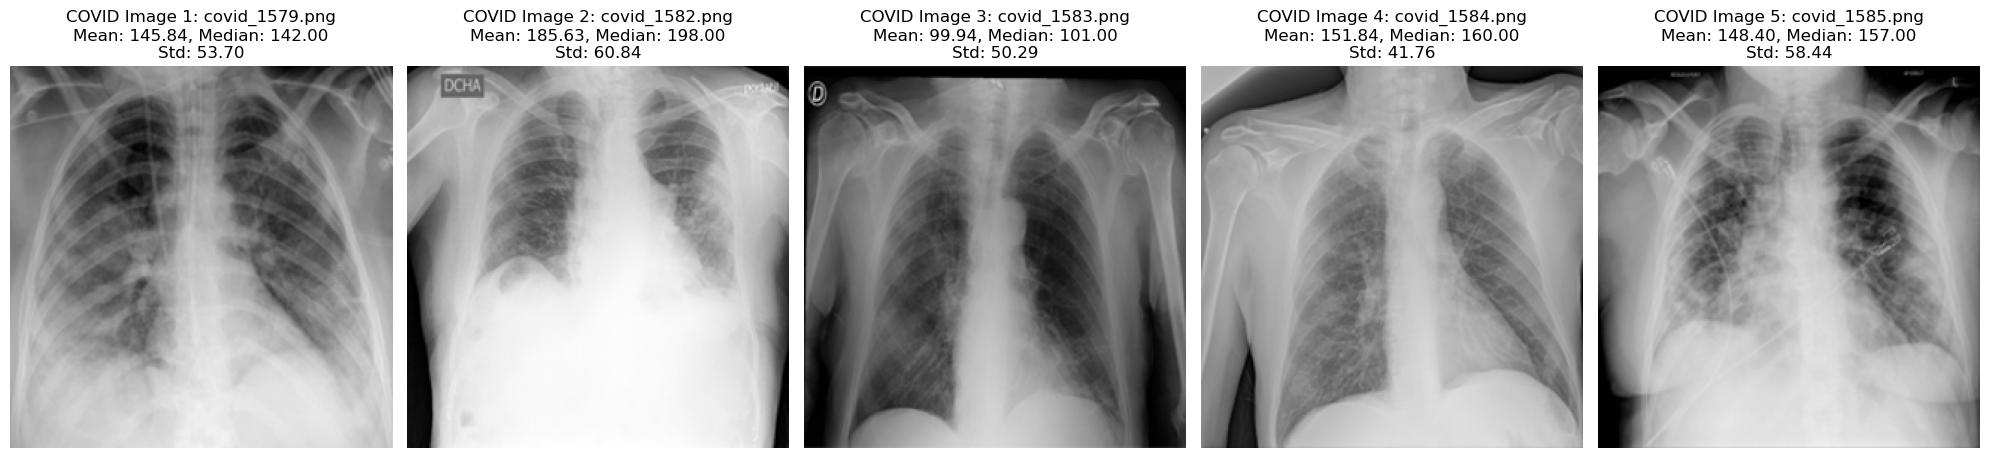

covid_1579.png - Mean: 145.84, Median: 142.00, Std Dev: 53.70
covid_1582.png - Mean: 185.63, Median: 198.00, Std Dev: 60.84
covid_1583.png - Mean: 99.94, Median: 101.00, Std Dev: 50.29
covid_1584.png - Mean: 151.84, Median: 160.00, Std Dev: 41.76
covid_1585.png - Mean: 148.40, Median: 157.00, Std Dev: 58.44


In [19]:
# Function to calculate mean, median, and standard deviation of images
def calculate_image_stats(images):
    stats = []
    for filename, img in images:
        # Convert image to grayscale for simplicity, or use img.flatten() to include all color channels
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate mean, median, and standard deviation
        mean_value = np.mean(gray_img)
        median_value = np.median(gray_img)
        std_value = np.std(gray_img)
        
        # Append the filename and the stats
        stats.append((filename, mean_value, median_value, std_value))
        
    return stats


# Calculate mean, median, and standard deviation for COVID images
covid_stats = calculate_image_stats(covid_images)

# Displaying the first COVID image and its mean, median, and std deviation
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images

for i, (ax, (filename, img)) in enumerate(zip(axes, covid_images)):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
    ax.imshow(img_rgb)
    ax.set_title(f'COVID Image {i + 1}: {filename}\nMean: {covid_stats[i][1]:.2f}, Median: {covid_stats[i][2]:.2f}\nStd: {covid_stats[i][3]:.2f}')
    ax.axis('off')  # Hide axis ticks and labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Optionally, you can also print the calculated stats for reference
for filename, mean, median, std in covid_stats:
    print(f'{filename} - Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std:.2f}')


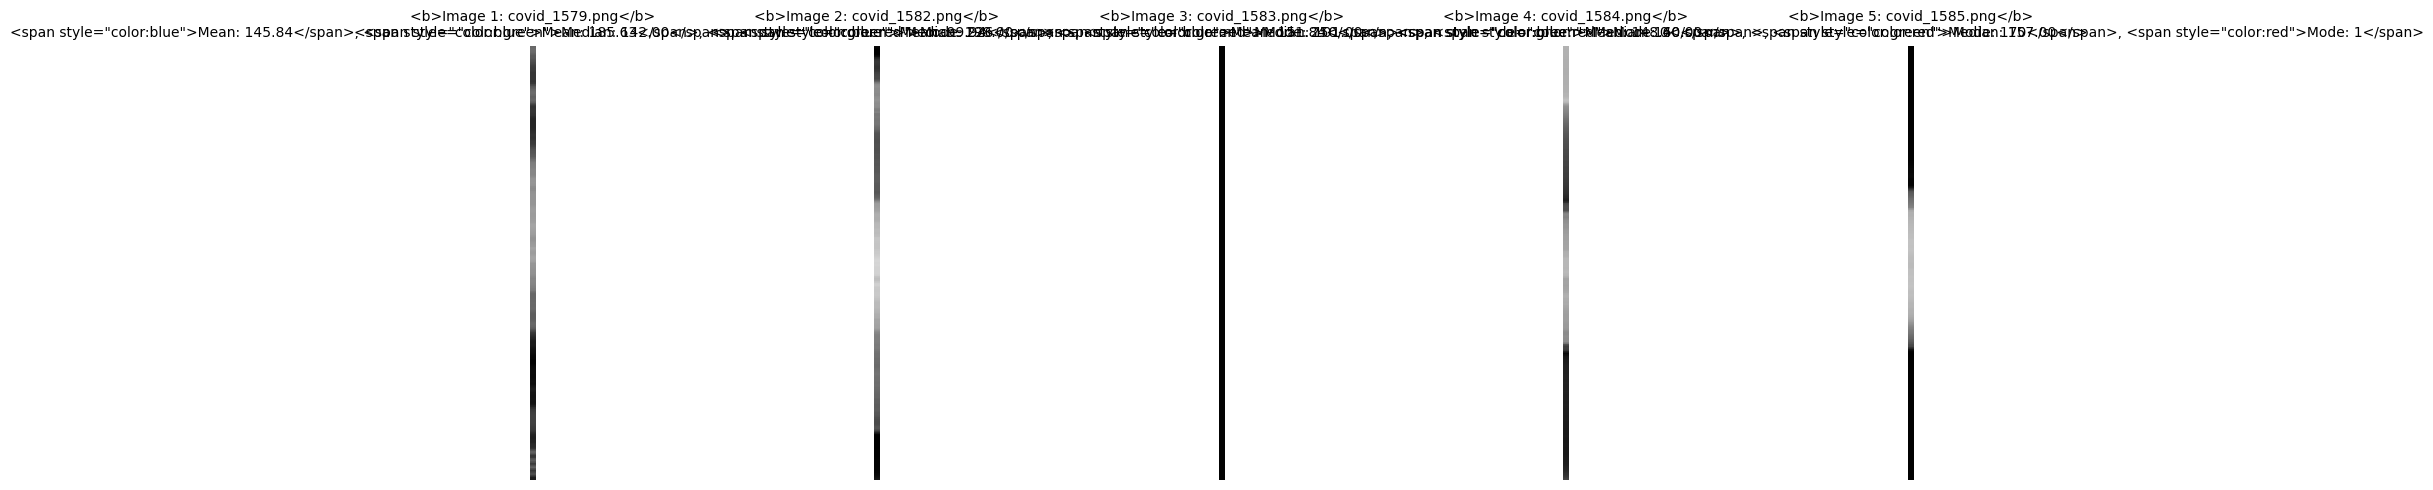

In [20]:

from scipy import stats  # For mode calculation

# Function to calculate the mode
def calculate_mode(image):
    # Flatten the grayscale image and find the mode
    values, counts = np.unique(image, return_counts=True)
    mode_value = values[np.argmax(counts)]
    return mode_value

# Displaying images along with their mean, median, and mode, with color differentiation
def visualize_image_stats(images, stats):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns for 5 images
    
    for i, (ax, (filename, img)) in enumerate(zip(axes, images)):
        img_rgb = cv2.cvtColor(img[1], cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        ax.imshow(img_rgb)
        mean, median, mode = stats[i]
        
        # Color-coding the mean, median, and mode in the title
        title = (f'<b>Image {i+1}: {filename}</b>\n'
                 f'<span style="color:blue">Mean: {mean:.2f}</span>, '
                 f'<span style="color:green">Median: {median:.2f}</span>, '
                 f'<span style="color:red">Mode: {mode}</span>')
        
        # Set the title with HTML formatting
        ax.set_title(title, fontsize=10, color='black')
        ax.axis('off')  # Hide axis ticks and labels
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Calculate mean, median, and mode for a list of images
def calculate_image_stats(images):
    stats = []
    for filename, img in images:
        # Convert to grayscale for simplicity
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate mean, median, and mode
        mean_value = np.mean(gray_img)
        median_value = np.median(gray_img)
        mode_value = calculate_mode(gray_img)
        
        # Append the calculated values
        stats.append((mean_value, median_value, mode_value))
    
    return stats

# Example of how to use this with your image data (e.g., for COVID images)
covid_images = load_images_from_folder(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", num_images=5)
covid_stats = calculate_image_stats(covid_images)
visualize_image_stats(covid_images, covid_stats)



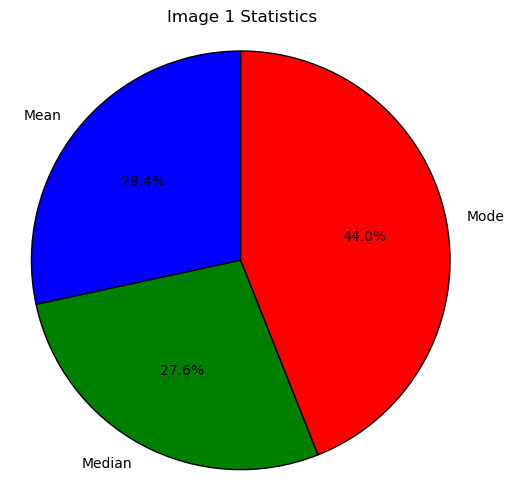

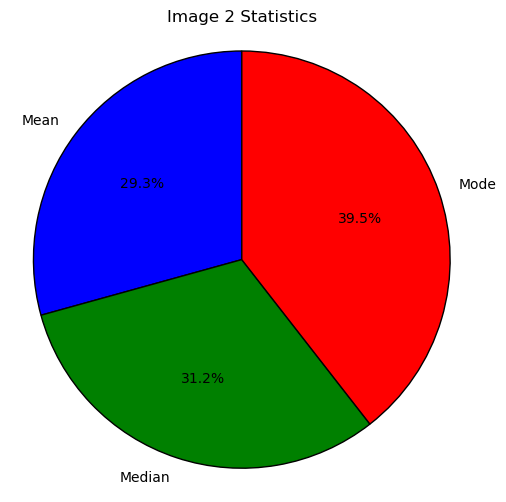

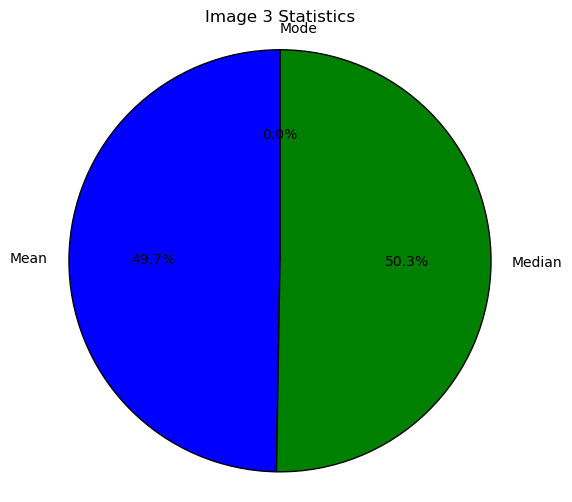

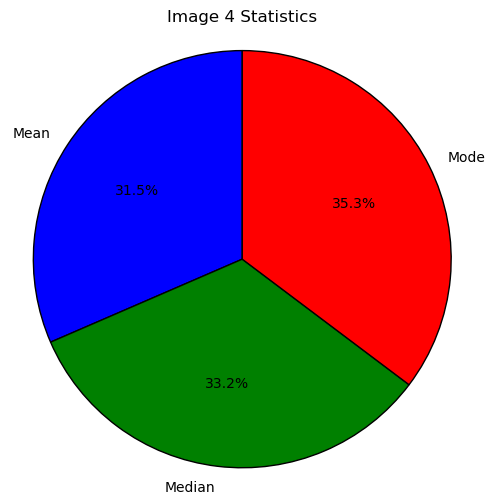

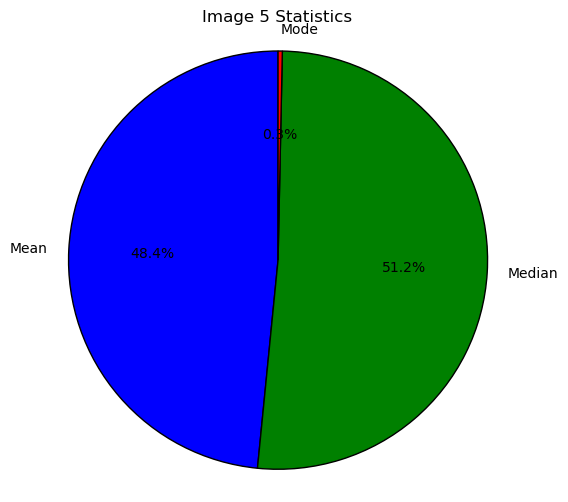

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats  # For mode calculation

# Function to calculate the mode
def calculate_mode(image):
    values, counts = np.unique(image, return_counts=True)
    mode_value = values[np.argmax(counts)]
    return mode_value

# Function to display a pie chart for mean, median, and mode for a single image
def visualize_pie_chart(mean, median, mode, image_index):
    # Data for the pie chart
    data = [mean, median, mode]
    labels = ['Mean', 'Median', 'Mode']
    colors = ['blue', 'green', 'red']

    # Creating a new figure for the pie chart
    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
            wedgeprops={'edgecolor': 'black'})
    plt.title(f'Image {image_index + 1} Statistics')
    plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
    plt.show()

# Calculate mean, median, and mode for a list of images
def calculate_image_stats(images):
    stats = []
    for filename, img in images:
        # Convert to grayscale for simplicity
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate mean, median, and mode
        mean_value = np.mean(gray_img)
        median_value = np.median(gray_img)
        mode_value = calculate_mode(gray_img)
        
        # Append the calculated values
        stats.append((mean_value, median_value, mode_value))
    
    return stats

# Example of how to use this with your image data (e.g., for COVID images)
covid_images = load_images_from_folder(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", num_images=5)
covid_stats = calculate_image_stats(covid_images)

# Visualize each pie chart individually
for i, (mean, median, mode) in enumerate(covid_stats):
    visualize_pie_chart(mean, median, mode, i)



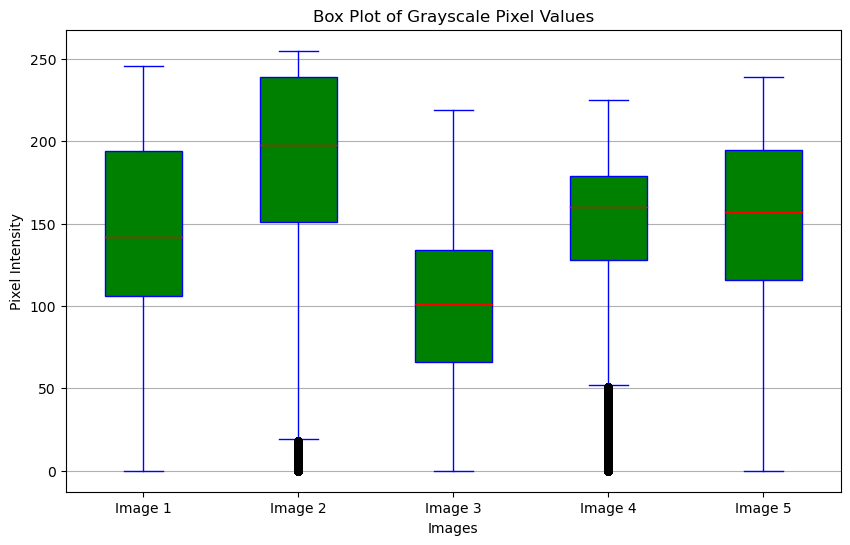

In [22]:

from scipy import stats  # For mode calculation

# Function to calculate the mode
def calculate_mode(image):
    values, counts = np.unique(image, return_counts=True)
    mode_value = values[np.argmax(counts)]
    return mode_value

# Function to calculate statistics (mean, median, mode, and standard deviation)
def calculate_image_stats(images):
    stats_list = []
    for filename, img in images:
        # Convert to grayscale for simplicity
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate mean, median, mode, and standard deviation
        mean_value = np.mean(gray_img)
        median_value = np.median(gray_img)
        mode_value = calculate_mode(gray_img)
        std_dev_value = np.std(gray_img)
        
        # Append the calculated values along with the image data
        stats_list.append((mean_value, median_value, mode_value, std_dev_value, gray_img))
    
    return stats_list

# Function to display a box plot for the standard deviation of pixel values
def visualize_box_plot(stats):
    # Prepare data for box plot
    pixel_values = [stat[4].flatten() for stat in stats]  # Flatten the grayscale images

    plt.figure(figsize=(10, 6))
    plt.boxplot(pixel_values, patch_artist=True,
                boxprops=dict(facecolor='green', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                flierprops=dict(marker='o', color='green', markersize=5))
    
    plt.title('Box Plot of Grayscale Pixel Values')
    plt.xlabel('Images')
    plt.ylabel('Pixel Intensity')
    plt.xticks(range(1, len(stats) + 1), [f'Image {i+1}' for i in range(len(stats))])
    plt.grid(axis='y')
    plt.show()

# Example of how to use this with your image data (e.g., for COVID images)
covid_images = load_images_from_folder(r"D:\DataScientist\Dataset-Present\archive\Infection Segmentation Data\Infection Segmentation Data\Test\COVID-19\images", num_images=5)
covid_stats = calculate_image_stats(covid_images)

# Visualize the box plot for the grayscale pixel values
visualize_box_plot(covid_stats)

